In [1]:
from helpers import * 
from boundaries import *
from augment import *
from processor import *

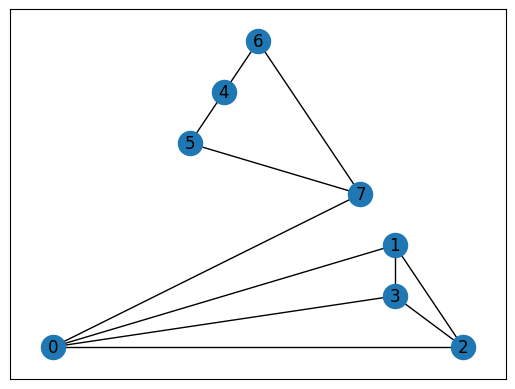

In [2]:
G_st = st_graph()   
plot_planar(G_st)

ic| cut_vertices: [7, 0]


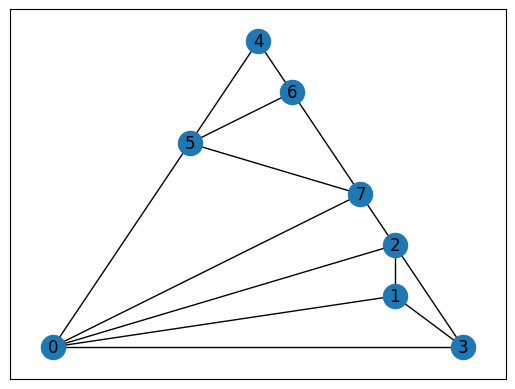

In [3]:
p = Processor(G_st)
p.augment()
pos = plot_planar(p.G, p.embed)

In [4]:
b = Boundaries(p.G, p.embed)

In [5]:
b.boundary_nodes

array([0, 3, 4, 5, 2, 6, 7])

In [6]:
b.boundary_edges

[(0, 3), (0, 5), (2, 3), (2, 7), (4, 5), (4, 6), (6, 7)]

ic| tri.target_edge: (0, 3)
ic| 'same y', n1_y: -0.3620689655172414, n2_y: -0.3620689655172414
ic| len(l3_cycles): 8, m: 16, n: 9, m-n+1: 8


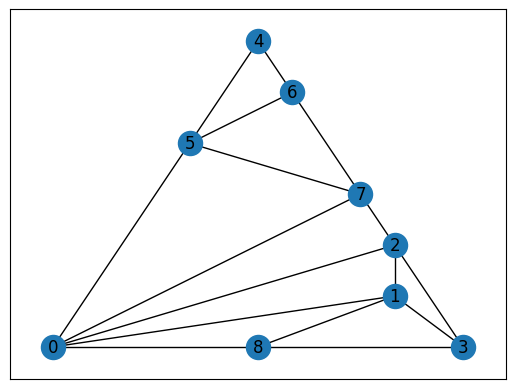

In [7]:
p.fix_separating_triangles()
plot_planar(p.G, p.s.embed)

In [10]:
p.s.sep_triangles

[SeperatingTriangle([0, 3, 2], 1, (0, 3))]